# Dataset Visualization and Analysis

## Data Import

In [46]:
import pandas as pd

# Relative path to the CSV
csv_path = './dataset/train/DailyDelhiClimateTrain.csv'

# Load the dataset
df = pd.read_csv(csv_path)

# Quick look at the data
print(df.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [47]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


## Dataset Statistics

In [48]:
print(df.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333


## Dataset Visulization

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
numeric_cols = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# Set style
sns.set(style="whitegrid")




### Box Plots

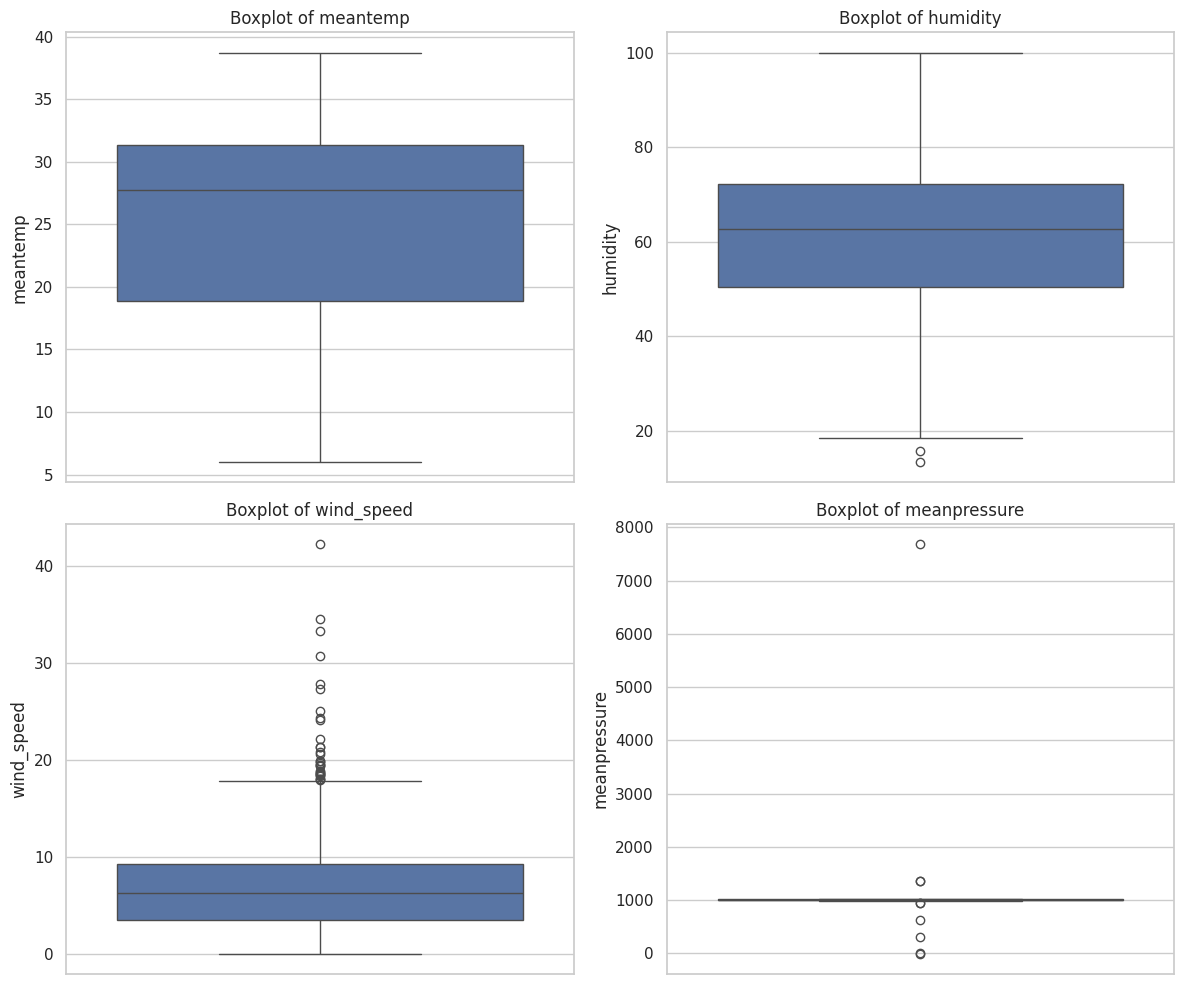

In [50]:
# 1. Box plots for all numeric columns
# Plot each feature in a separate subplot
plt.figure(figsize=(12, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
plt.show()



### Histograms

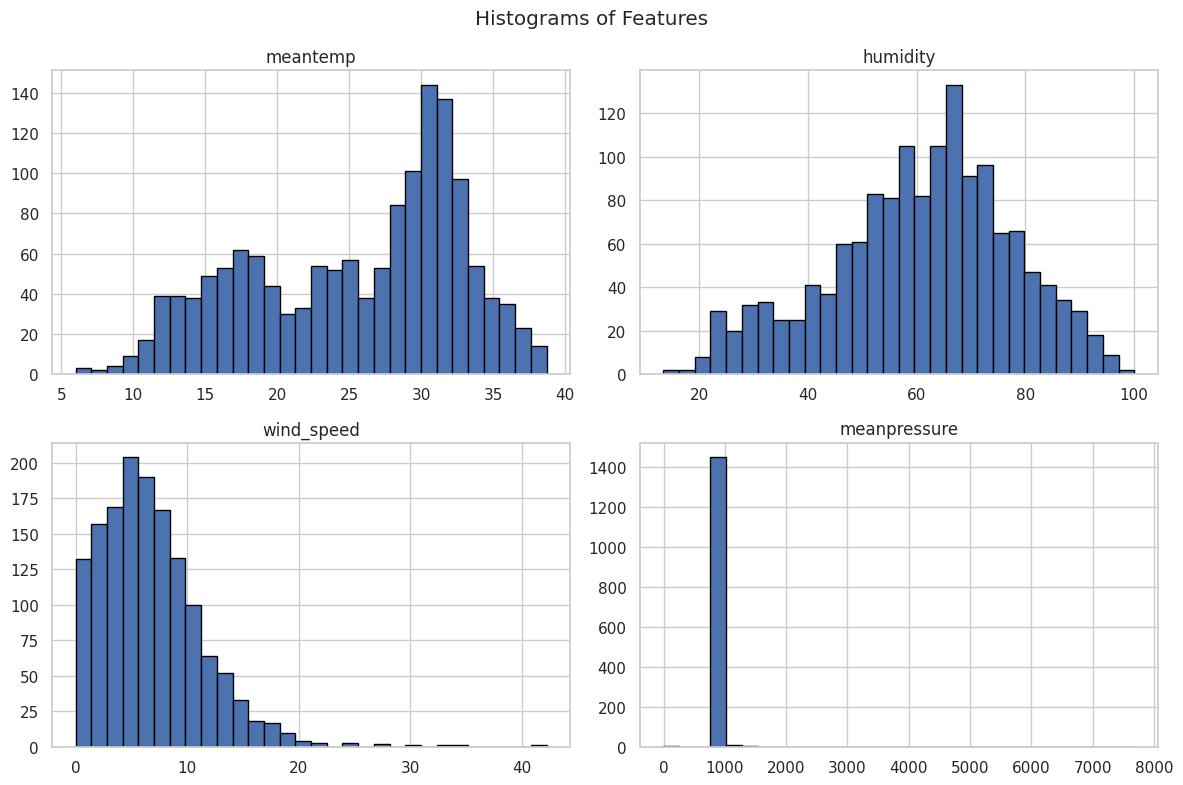

In [51]:
# 2. Histograms for each feature
df[numeric_cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.suptitle("Histograms of Features")
plt.tight_layout()
plt.show()



### Violin Plots

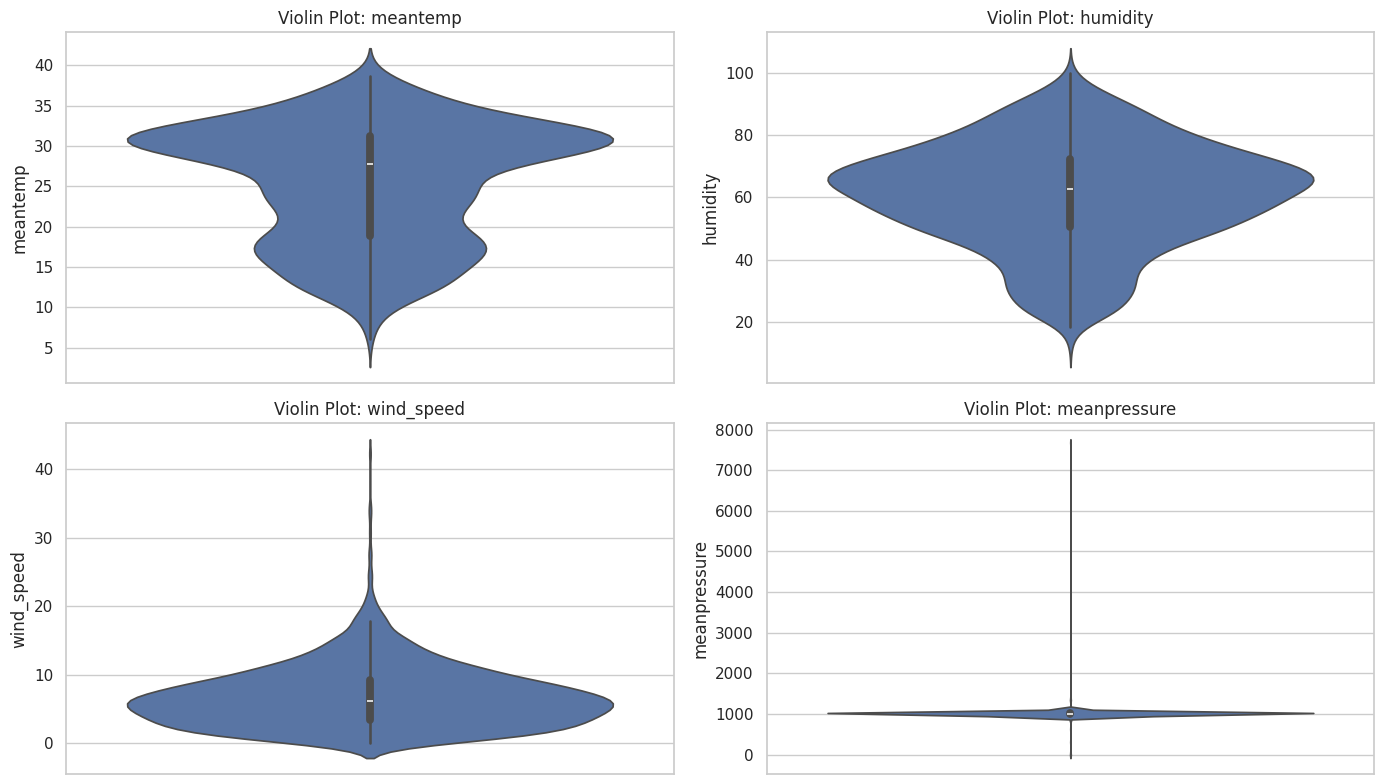

In [52]:
# 3. Violin plots
plt.figure(figsize=(14, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.violinplot(y=df[col])
    plt.title(f"Violin Plot: {col}")
plt.tight_layout()
plt.show()

### Correlation Heatmap

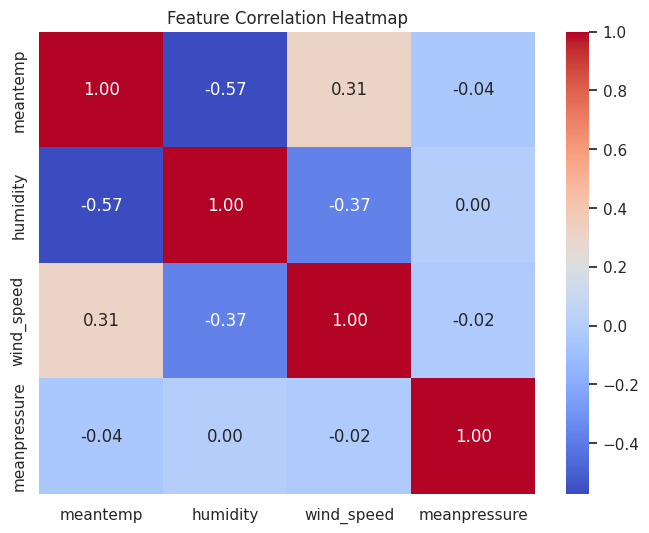

In [53]:
# 4. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Trend and Patterns of Time Series Data

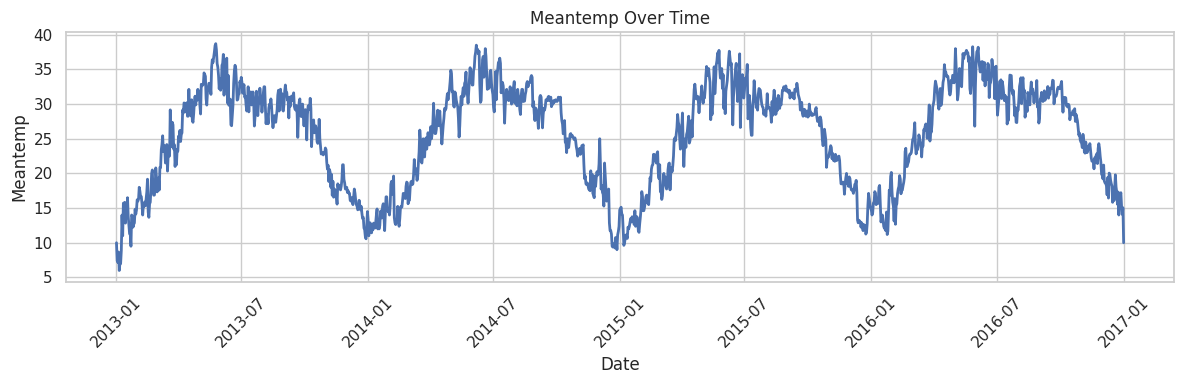

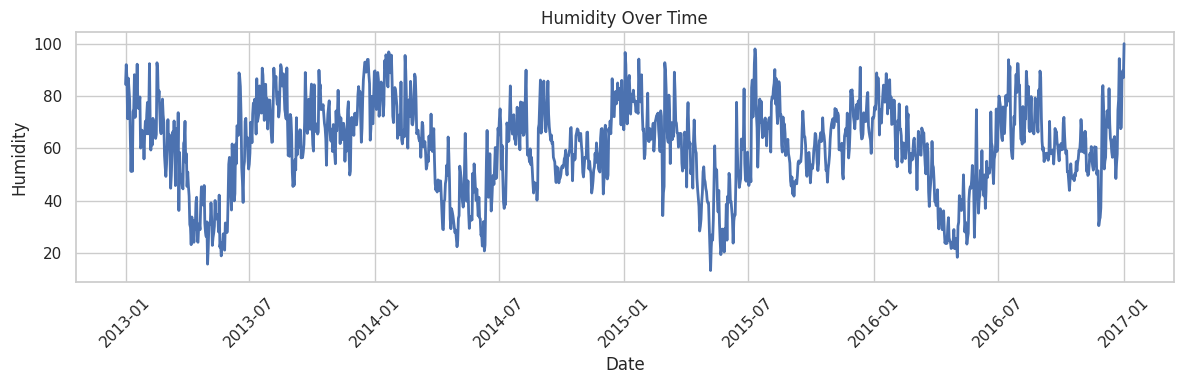

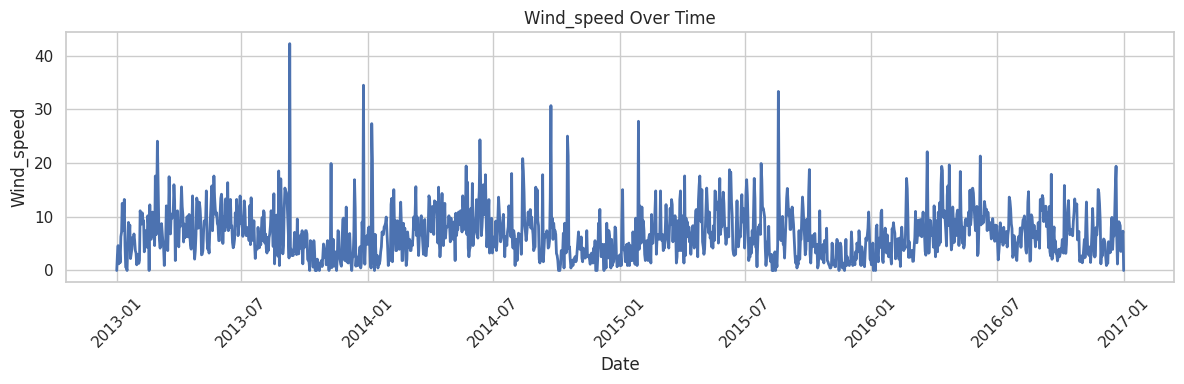

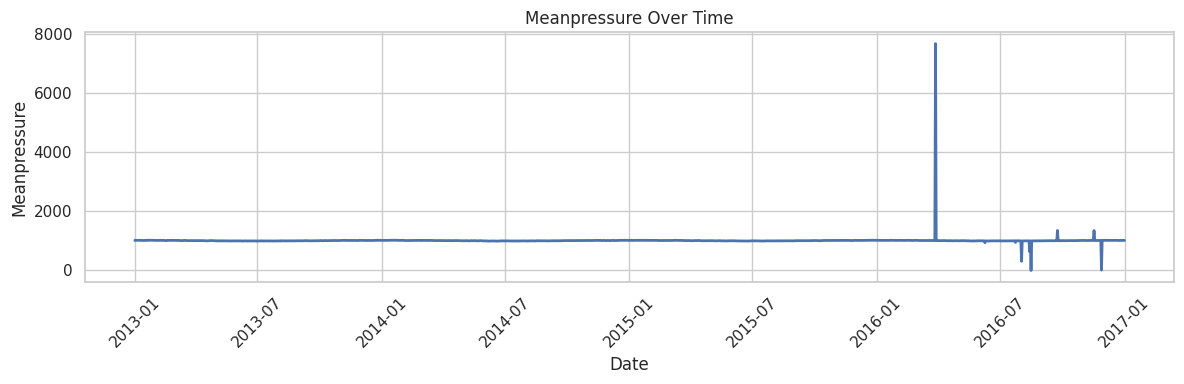

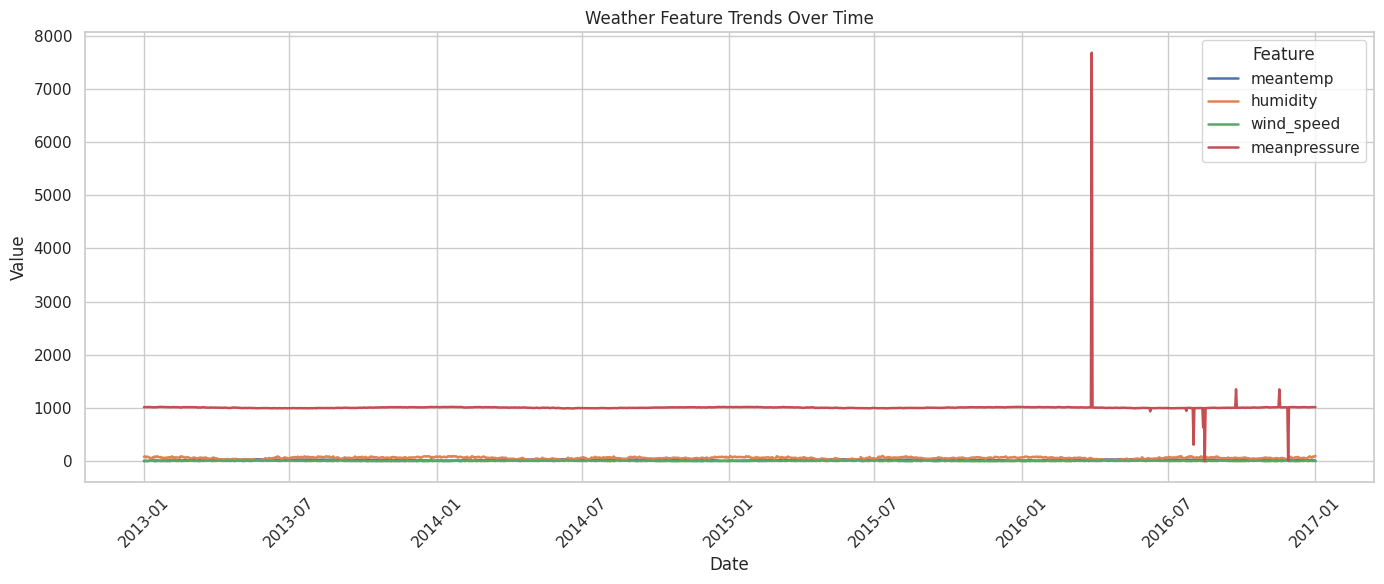

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Use a clean Seaborn style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)

# Make sure your date column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# List of features to plot
features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

# 1. Plot each feature's trend over time
for feature in features:
    plt.figure()
    sns.lineplot(x='date', y=feature, data=df, linewidth=2.0)
    plt.title(f'{feature.capitalize()} Over Time')
    plt.xlabel('Date')
    plt.ylabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 2. Combined plot of all features
plt.figure(figsize=(14, 6))
for feature in features:
    sns.lineplot(x='date', y=feature, data=df, label=feature, linewidth=1.8)

plt.title('Weather Feature Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(title='Feature')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


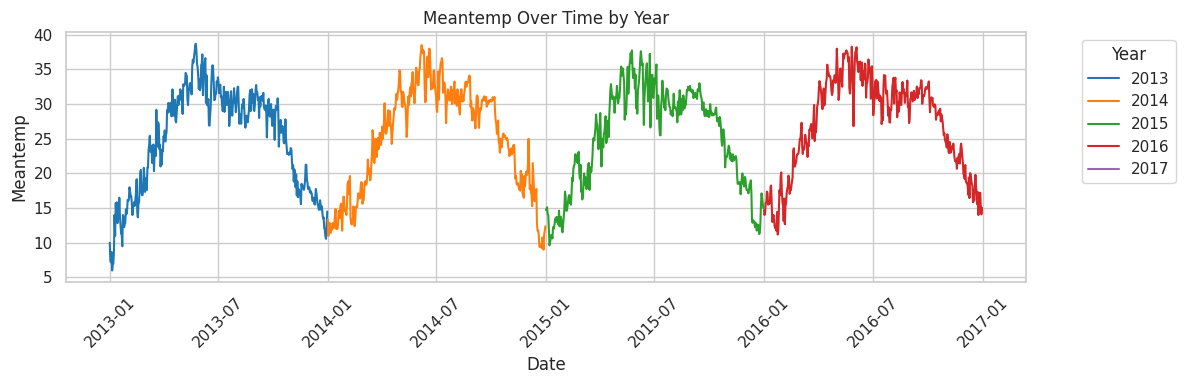

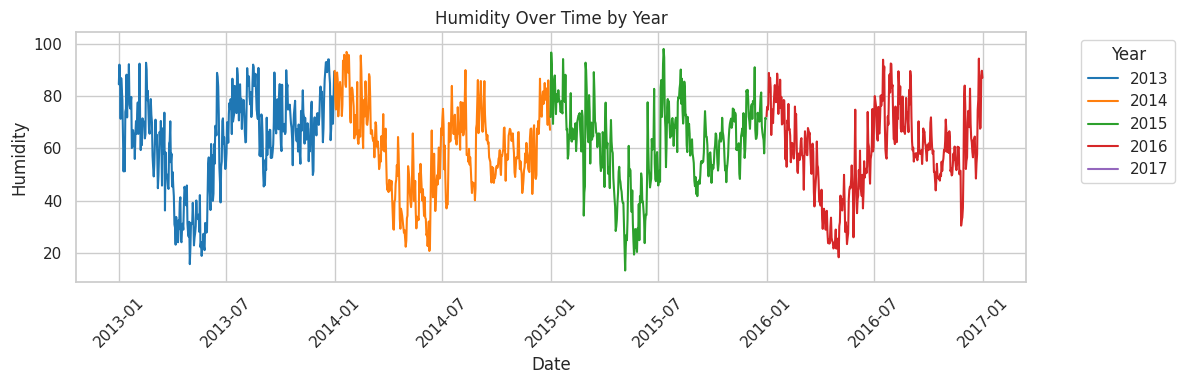

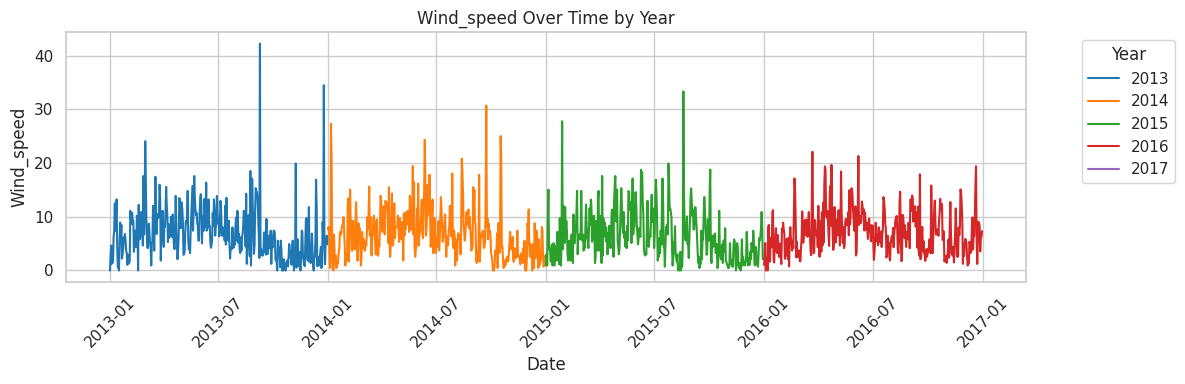

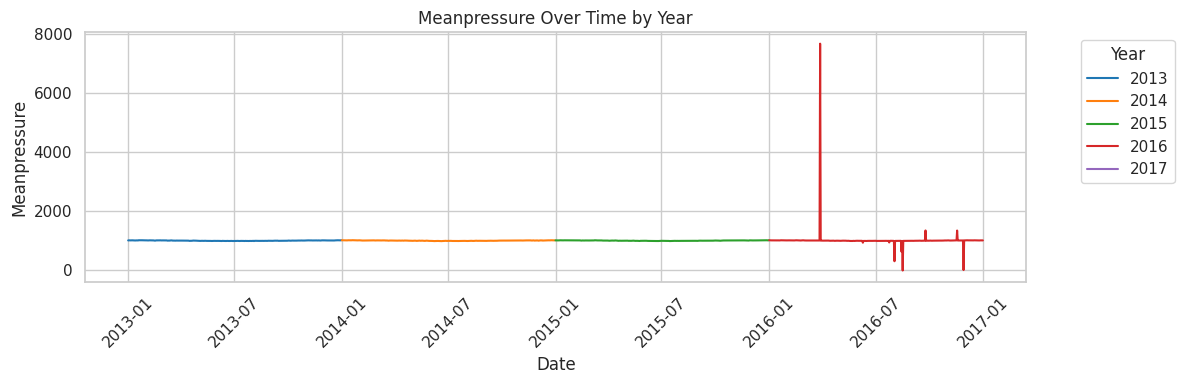

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

features = ['meantemp', 'humidity', 'wind_speed', 'meanpressure']

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)

# 1. Plot each feature with year-based coloring
for feature in features:
    plt.figure()
    sns.lineplot(data=df, x='date', y=feature, hue='year', palette='tab10', linewidth=1.5)
    plt.title(f'{feature.capitalize()} Over Time by Year')
    plt.xlabel('Date')
    plt.ylabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


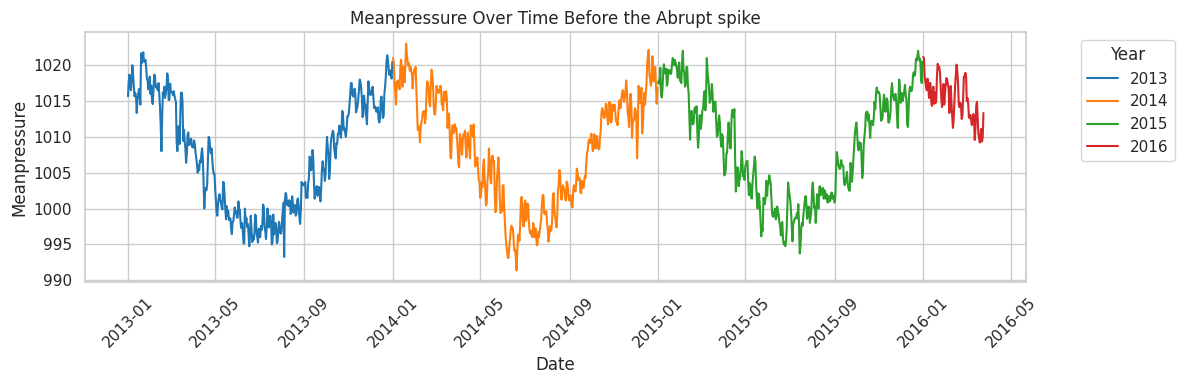

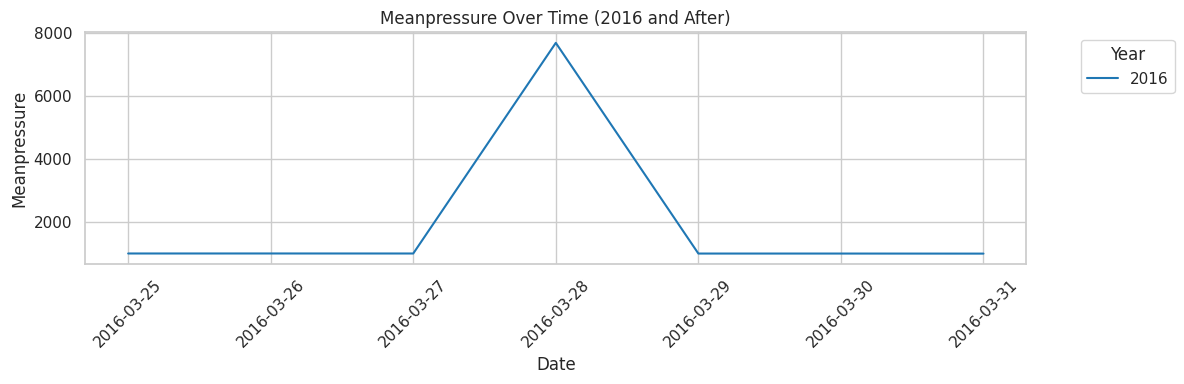

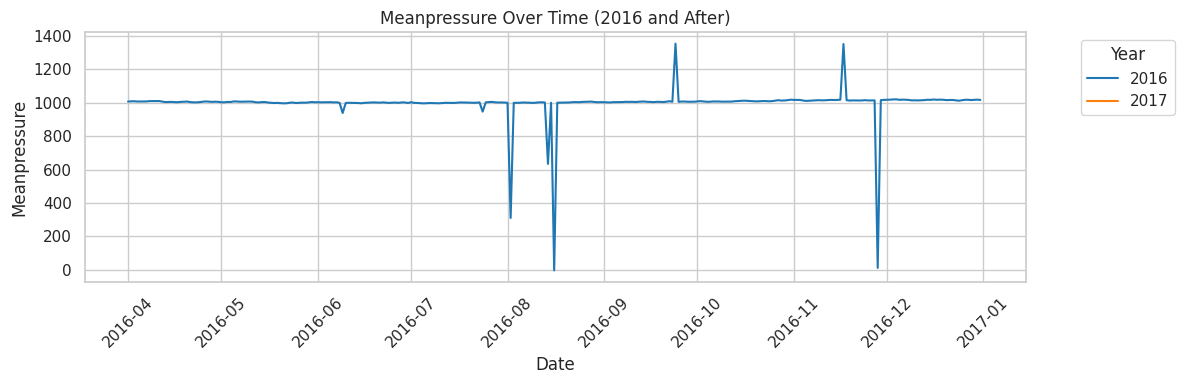

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime and extract year
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year

# Split the dataset
df_before_spike = df[df['date'] < '2016-03-25']
df_spike = df[(df['date'] >= '2016-03-25') & (df['date'] < '2016-04-01')]
df_after_spike = df[df['date'] >= '2016-04-01']


sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 4)

# Plot meanpressure for before 2016
plt.figure()
sns.lineplot(data=df_before_spike, x='date', y='meanpressure', hue='year', palette='tab10', linewidth=1.5)
plt.title('Meanpressure Over Time Before the Abrupt spike')
plt.xlabel('Date')
plt.ylabel('Meanpressure')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot meanpressure for 2016 and after
plt.figure()
sns.lineplot(data=df_spike, x='date', y='meanpressure', hue='year', palette='tab10', linewidth=1.5)
plt.title('Meanpressure Over Time (2016 and After)')
plt.xlabel('Date')
plt.ylabel('Meanpressure')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Plot meanpressure for 2016 and after
plt.figure()
sns.lineplot(data=df_after_spike, x='date', y='meanpressure', hue='year', palette='tab10', linewidth=1.5)
plt.title('Meanpressure Over Time (2016 and After)')
plt.xlabel('Date')
plt.ylabel('Meanpressure')
plt.xticks(rotation=45)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
